# Dollar bars vs Volume bars Sunny
Purpose: To determine whether we should use dollar bars or volume bars for the rest of this project. First, we will find metrics that are important, then find out how to implement them, then come to a conclusion on which bars perform the best. 

Helpful resources:
- https://towardsdatascience.com/advanced-candlesticks-for-machine-learning-ii-volume-and-dollar-bars-6cda27e3201d
- Advances in Financial Machine Learning from 2.3.1 to 2.3.2

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.stattools as sm
from scipy.stats import pearsonr

In [2]:
db = pd.read_csv("../data/BTCUSDT-dollar-bars.csv")
vb = pd.read_csv("../data/BTCUSDT-volume-bars.csv")
tb = pd.read_csv("../data/discarded/BTCUSDT-minute-target-ui.csv")

In [40]:
rb = np.random.uniform(1, 60000, 1_000_000) #Random bars

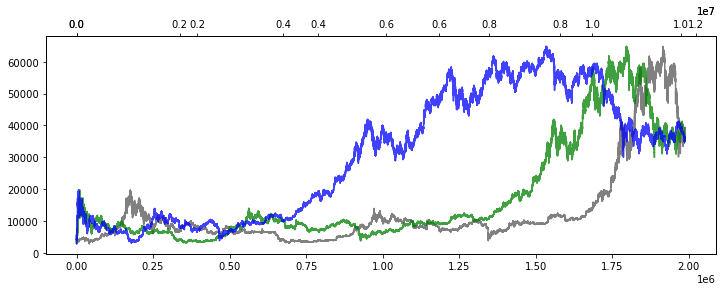

In [42]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(tb.close, color="gray")
ax1 = ax.twiny()
ax1.plot(vb.close, color="green", alpha=.75)
ax2 = ax.twiny()
ax2.plot(db.close, color="blue", alpha=.75);


## Serial Correlation/ auto-correlation

In [24]:
def returns(candles_close_prices):
    return np.diff(np.log(candles_close_prices))

In [43]:
db_sc = returns(db.close)
vb_sc = returns(vb.close)
tb_sc = returns(tb.close)
rb_sc = returns(rb)

In [45]:
np.mean(vb_sc)

1.8038338856252555e-07

In [53]:
sm.durbin_watson(tb_sc)

2.1381491972397275

In [54]:
sm.durbin_watson(vb_sc)

2.323736309255039

In [55]:
sm.durbin_watson(db_sc)

2.1909464460628354

In [66]:
corr, _ = pearsonr(tb_sc[:-1], tb_sc[1:])
corr

-0.06907541053093148

In [67]:
corr, _ = pearsonr(vb_sc[:-1], vb_sc[1:])
corr

-0.16186826879553662

In [68]:
corr, _ = pearsonr(db_sc[:-1], db_sc[1:])
corr

-0.09547390759127078

## Downsampling
Reasoning: Ver few bars for time series, more for dollar, and even more for volume bars. Need equal amounts

In [70]:
def downsample_to_proportion(rows, proportion):

    counter = 0.0
    last_counter = None
    results = []

    for row in rows:

        counter += proportion

        if int(counter) != last_counter:
            results.append(row)
            last_counter = int(counter)

    return results

In [75]:
downsample_to_proportion([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.5)

[1, 2, 4, 6, 8, 10]

In [80]:
tb_ds = downsample_to_proportion(tb.close, 1_000_000/len(tb))
vb_ds = downsample_to_proportion(vb.close, 1_000_000/len(vb))
db_ds = downsample_to_proportion(db.close, 1_000_000/len(db))

In [84]:
db_sc = returns(db_ds)
vb_sc = returns(vb_ds)
tb_sc = returns(tb_ds)
print(f"dollor bars: {np.mean(db_sc)}")
print(f"volume bars: {np.mean(vb_sc)}")
print(f"time bars: {np.mean(tb_sc)}")
# Result: I think very minor win for dollar bars, both better than time bars

dollor bars: 2.1206878737648934e-06
volume bars: 2.128316363757566e-06
time bars: 2.206236260457425e-06


In [91]:
corr, _ = pearsonr(db_sc[:-1], db_sc[1:])
print(f"dollor bars: {corr}")
corr, _ = pearsonr(vb_sc[:-1], vb_sc[1:])
print(f"volume bars: {corr}")
corr, _ = pearsonr(tb_sc[:-1], tb_sc[1:])
print(f"time bars: {corr}")

dollor bars: -0.005919938106342808
volume bars: -0.011168987807684718
time bars: -0.07398555090077386
